In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import pandas as pd
import locale
import time
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
myfont = FontProperties(fname=r'c:\windows\fonts\simsun.ttc', size=14)

In [2]:
path = ('https://data.kcg.gov.tw/dataset/f620e491-1076-415c-83dd-abbe94506479/resource/2da251ea-b1e5-4ca1-984a-cb73b66e7cec/download/6.csv')
df = pd.read_csv(path, encoding = "Big5")#[NCTS]DavidChi
df.head()

,Unnamed: 0,汽車登記數(輛)[含特種車不含拖車],機車登記數(輛),汽車停車格位數,機車停車格位數,高雄捷運系統營運---載客人次,高雄捷運系統營運---車次,公車客運---公車系統總運量(人次),公車客運 ---市區公車運量(人次),公車客運---捷運接駁公車運量(人次),...,交通事故---車輛肇事受傷人數(A1+A2纇),交通事故---車輛肇事死亡人數(A1纇),交通事故---違反交通管理案件數,主要觀光遊憩區人次,主要觀光遊憩區人次--- 旗津風景區,主要觀光遊憩區人次---蓮池潭,主要觀光遊憩區人次---壽山動物園,主要觀光遊憩區人次---佛光山,主要觀光遊憩區人次---澄清湖,主要觀光遊憩區人次---美濃客家文物館
0,2013年12月,845438,2089526,96705.0,50061.0,5548220,19510,…,…,…,...,6626.0,20,102563,2387315.0,53492.0,94568.0,53638.0,521475.0,154243.0,12936.0
1,2014年1月,847001,2091758,96675.0,51232.0,5199190,19214,4366366,2708635,1383398,...,6600.0,24,120518,2766679.0,91696.0,124560.0,93786.0,608252.0,131083.0,9012.0
2,2014年2月,846938,2086305,97263.0,51861.0,5346222,17760,4401387,2935316,1191465,...,5123.0,8,110744,5843497.0,50684.0,201940.0,155893.0,2944854.0,177916.0,27609.0
3,2014年3月,847416,2082435,97384.0,52299.0,5069447,19326,4539754,2997295,1283249,...,5735.0,20,129812,2460559.0,41905.0,95376.0,92441.0,473967.0,167695.0,12180.0
4,2014年4月,849083,2081795,98046.0,53731.0,4854796,18670,4666521,3122337,1275007,...,5665.0,14,122820,2340455.0,43368.0,91752.0,85475.0,404360.0,149070.0,12248.0


In [3]:
df.index

RangeIndex(start=0, stop=62, step=1)

In [4]:
df.isnull().any() 

Unnamed: 0                  False
汽車登記數(輛)[含特種車不含拖車]          False
機車登記數(輛)                    False
汽車停車格位數                      True
機車停車格位數                      True
高雄捷運系統營運---載客人次             False
高雄捷運系統營運---車次               False
公車客運---公車系統總運量(人次)           True
公車客運 ---市區公車運量(人次)           True
公車客運---捷運接駁公車運量(人次)          True
公車客運---公路客運運量(人次)            True
計程車系統運量                      True
水上巴士系統---客運人數總計(人次)          True
水上巴士系統---愛之船客運人次             True
水上巴士系統---鴨子船客運人次            False
公共自行車租賃次數                   False
高鐵左營站---進站旅客人數(人次)           True
高鐵左營站---車次                   True
高雄港---進出港貨櫃數(TEU)           False
高雄港---進出港貨物吞吐量(公噸)           True
小港機場旅客---國際線(人次)             True
小港機場旅客---國內線(人次)             True
小港機場班次---到(架次)               True
小港機場班次---離(架次)               True
拖吊違規停車車輛數---汽車(輛)           False
拖吊違規停車車輛數---機車(輛)           False
觀光旅館---總住房人次                 True
觀光旅館---本國旅客                  True
觀光旅館---日本旅客                  True
觀光旅館---大陸旅客   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 43 columns):
Unnamed: 0                  62 non-null object
汽車登記數(輛)[含特種車不含拖車]          62 non-null int64
機車登記數(輛)                    62 non-null int64
汽車停車格位數                     61 non-null float64
機車停車格位數                     61 non-null float64
高雄捷運系統營運---載客人次             62 non-null int64
高雄捷運系統營運---車次               62 non-null int64
公車客運---公車系統總運量(人次)          61 non-null object
公車客運 ---市區公車運量(人次)          61 non-null object
公車客運---捷運接駁公車運量(人次)         61 non-null object
公車客運---公路客運運量(人次)           61 non-null object
計程車系統運量                     61 non-null object
水上巴士系統---客運人數總計(人次)         61 non-null object
水上巴士系統---愛之船客運人次            61 non-null float64
水上巴士系統---鴨子船客運人次            62 non-null int64
公共自行車租賃次數                   62 non-null int64
高鐵左營站---進站旅客人數(人次)          61 non-null float64
高鐵左營站---車次                  61 non-null float64
高雄港---進出港貨櫃數(TEU)           62 non-null object
高雄港--

In [6]:
df.values

array([['2013年12月', 845438, 2089526, ..., 521475.0, 154243.0, 12936.0],
       ['2014年1月', 847001, 2091758, ..., 608252.0, 131083.0, 9012.0],
       ['2014年2月', 846938, 2086305, ..., 2944854.0, 177916.0, 27609.0],
       ...,
       ['2018年11月', 906520, 2008052, ..., 816357.0, 139164.0, 8567.0],
       ['2018年12月', 907200, 2008475, ..., 860844.0, 159966.0, 8590.0],
       ['2019年1月', 907650, 2009542, ..., nan, nan, nan]], dtype=object)

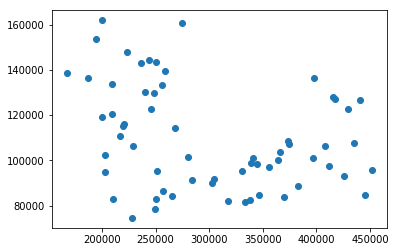

In [7]:
x = np.array(df['公共自行車租賃次數'])
y = np.array(df['交通事故---違反交通管理案件數'])

plt.scatter(x,y)

In [8]:
regr = LinearRegression()
X = x.reshape(len(x),1)
Y = y.reshape(len(y),1)
regr.fit(X,Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

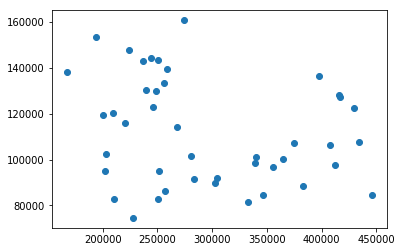

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 9999)
regr.fit(x_train,y_train) 

y_predict = regr.predict(x_test)
plt.scatter(x_train,y_train)

In [10]:
regr.score(x_test,y_test)

0.08450372329392353

Text(0,0.5,'交通事故---違反交通管理案件數')

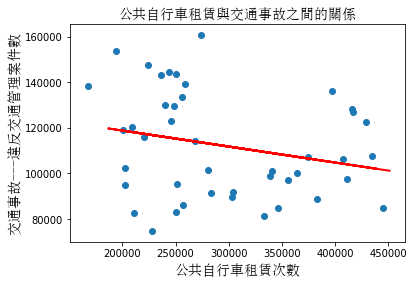

In [11]:
plt.plot(x_test,y_predict ,color='R',  linewidth=2, label="best line")
plt.scatter(x_train,y_train)

plt.title('公共自行車租賃與交通事故之間的關係',fontproperties=myfont) 
plt.xlabel('公共自行車租賃次數',fontproperties=myfont)  
plt.ylabel('交通事故---違反交通管理案件數',fontproperties=myfont)